In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
sns.set_theme(style = 'whitegrid')
file = '../data/raw/dataset_aircraft_failures.csv'
df = pd.read_csv(file)

print(df.info())
print(f'Valores nulos (NaNs): {df.isnull().sum().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287000 entries, 0 to 286999
Data columns (total 74 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   sensor_volt_gerador_1            287000 non-null  float64
 1   sensor_volt_gerador_2            287000 non-null  float64
 2   sensor_corrente_gerador_1        287000 non-null  float64
 3   sensor_corrente_gerador_2        287000 non-null  float64
 4   sensor_temp_bateria              287000 non-null  float64
 5   sensor_volt_bateria              287000 non-null  float64
 6   sensor_freq_sistema_eletrico     287000 non-null  float64
 7   sensor_pressao_hidr_A            287000 non-null  float64
 8   sensor_pressao_hidr_B            287000 non-null  float64
 9   sensor_temp_hidr_A               287000 non-null  float64
 10  sensor_temp_hidr_B               287000 non-null  float64
 11  sensor_nivel_fluido_hidr_A       287000 non-null  float64
 12  se

In [68]:
df.head()

,sensor_volt_gerador_1,sensor_volt_gerador_2,sensor_corrente_gerador_1,sensor_corrente_gerador_2,sensor_temp_bateria,sensor_volt_bateria,sensor_freq_sistema_eletrico,sensor_pressao_hidr_A,sensor_pressao_hidr_B,sensor_temp_hidr_A,...,sensor_temp_externa,sensor_gps_latitude,sensor_gps_longitude,sensor_gps_altitude,sensor_velocidade_gps,sensor_heading_magnetico,sensor_heading_gyro,nivel1,nivel2,nivel3
0,114.312616,114.656436,309.834713,294.377846,27.886438,28.185017,395.834181,2992.507700,2976.306851,41.754746,...,-46.980416,-23.501459,-46.607012,35220.710527,449.723818,93.739649,87.379583,NORMAL,NORMAL,NORMAL
1,114.241847,115.056328,310.811855,289.252447,21.570676,28.211859,399.257275,2988.685824,3003.935055,47.657991,...,-47.091172,-23.501421,-46.625197,35507.339736,453.087849,88.687018,90.296732,ESTRUTURAL,FUSELAGEM,DANO POR FADIGA
2,114.540161,115.214195,294.168506,288.635164,25.693645,28.114391,398.127782,3013.179672,2972.157104,46.182220,...,-42.009555,-23.501841,-46.611753,34777.380455,456.835672,92.262832,90.865130,SISTEMAS,MOTOR,EGT ALTA M2
3,115.357688,115.379010,306.406359,280.134057,21.745084,28.060878,399.821394,2998.147901,3002.212748,44.810130,...,-47.256042,-23.484722,-46.607695,34933.155888,453.248496,89.863677,93.849467,NORMAL,NORMAL,NORMAL
4,115.226967,114.598123,300.713920,295.836886,24.354710,28.271008,397.471187,2991.486552,2993.191720,47.453032,...,-44.101618,-23.488432,-46.605888,34456.874363,465.230820,85.968127,94.410683,NORMAL,NORMAL,NORMAL


In [61]:
print("\nBalanço de Classes (Nível 1):")
print(df['nivel1'].value_counts())


Balanço de Classes (Nível 1):
nivel1
NORMAL        200000
SISTEMAS       77000
ESTRUTURAL     10000
Name: count, dtype: int64


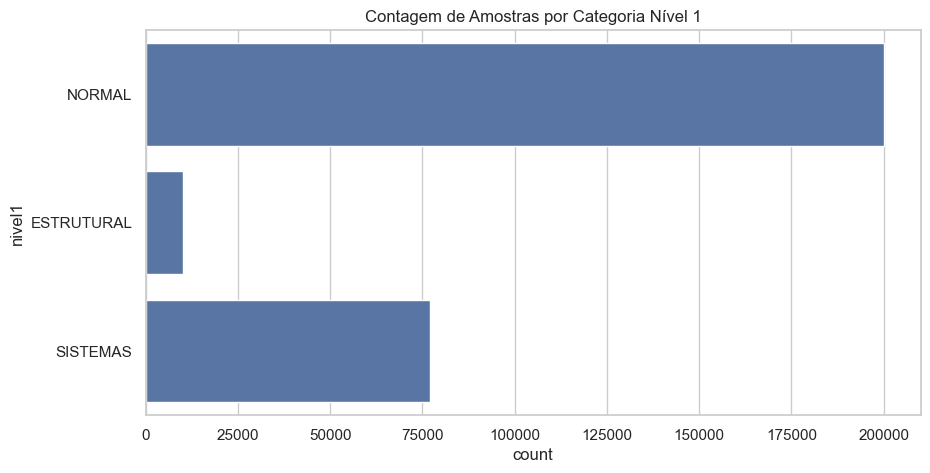

In [62]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['nivel1'])
plt.title('Contagem de Amostras por Categoria Nível 1')
plt.show()

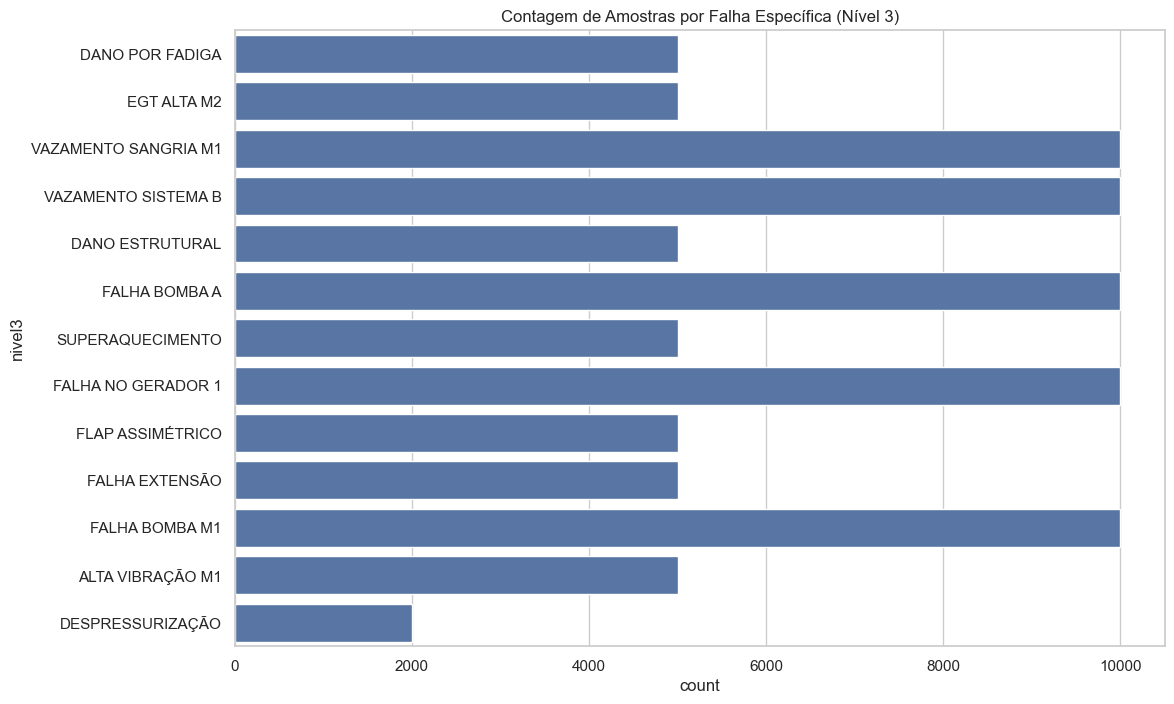

In [64]:
df_falhas = df[df['nivel1'] != 'NORMAL']

plt.figure(figsize=(12, 8))
sns.countplot(y=df_falhas['nivel3'])
plt.title('Contagem de Amostras por Falha Específica (Nível 3)')
plt.show()

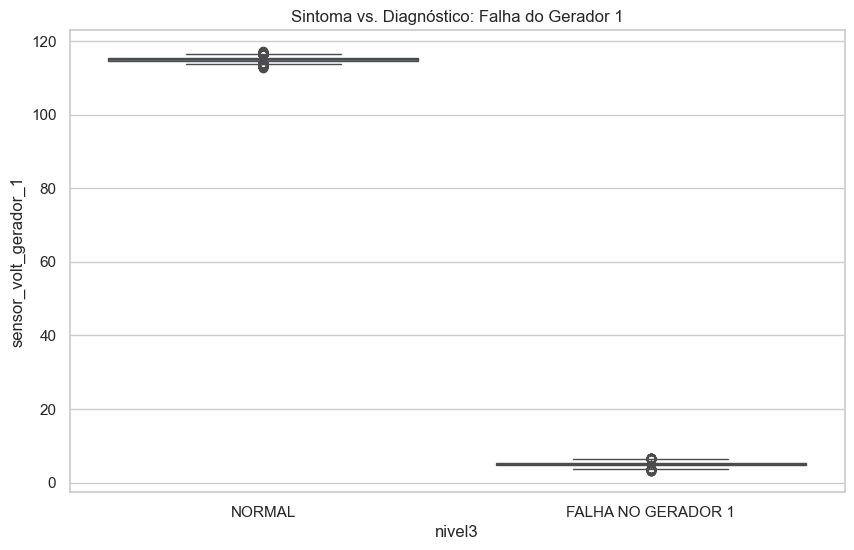

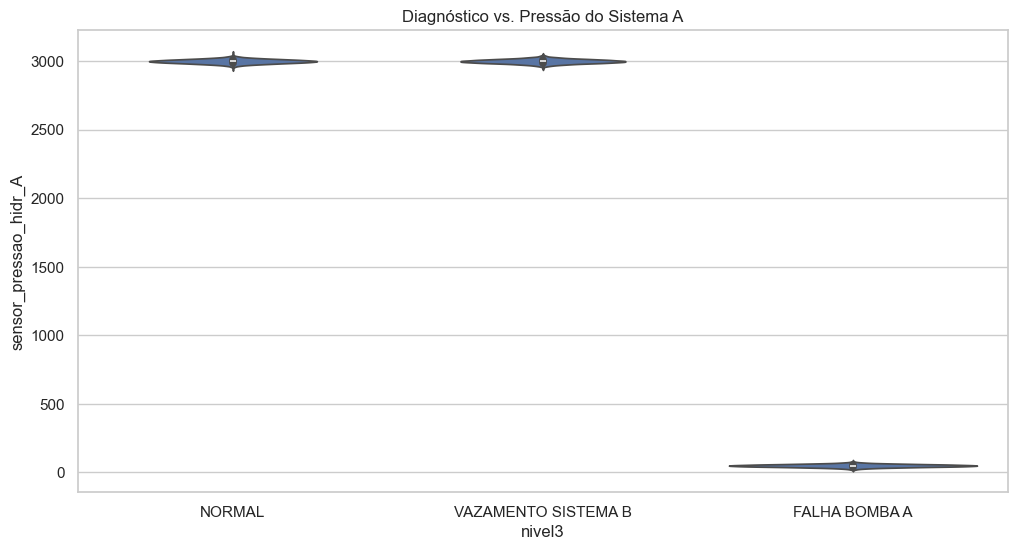

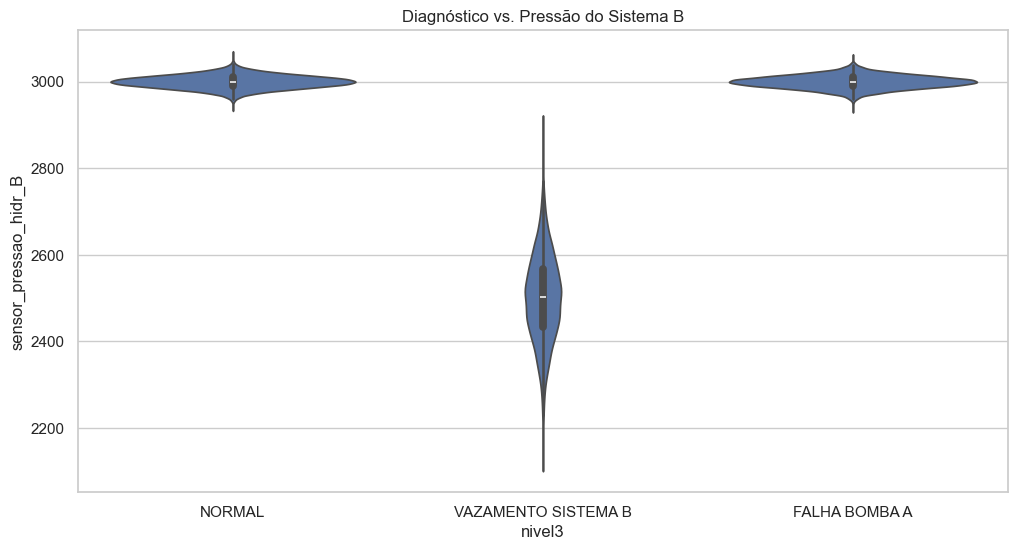

In [67]:
df_eletrico = df[(df['nivel2'] == 'ELÉTRICO') | (df['nivel1'] == 'NORMAL')]
df_hidraulico = df[(df['nivel2'] == 'HIDRÁULICO') | (df['nivel1'] == 'NORMAL')]

plt.figure(figsize=(10, 6))

sns.boxplot(x='nivel3', y='sensor_volt_gerador_1', data=df_eletrico)
plt.title('Sintoma vs. Diagnóstico: Falha do Gerador 1')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='nivel3', y='sensor_pressao_hidr_A', data=df_hidraulico)
plt.title('Diagnóstico vs. Pressão do Sistema A')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='nivel3', y='sensor_pressao_hidr_B', data=df_hidraulico)
plt.title('Diagnóstico vs. Pressão do Sistema B')
plt.show()

**NOTA:** Não há necessidade de escalonamento tendo em vista que estou usando modelos baseados em árvore, significa que ele é imune a escala das variáveis. O escalonamento seria um passo computacional desnecessário que não traria nenhum benefício para a performance. 

> Bibliografia para afirmação.
- [Artigo 01](https://www.nb-data.com/p/is-it-necessary-for-feature-scaling)
- [Artigo 02](https://www.kaggle.com/discussions/general/529362)
- [Artigo 03](https://medium.com/atoti/when-to-perform-a-feature-scaling-11a7fb4f9f13)